# Image Segmentation - Thresholding 

In [1]:
# Import necessary libraries
import cv2 # image processing and filtering such as color space conversion, histograms, and, geometric transformations
import numpy as np # arithmetic and algebra 
import math
from matplotlib import pyplot as plt # data visualization 
from PIL import Image # Image editing, drawing, and enhancement 

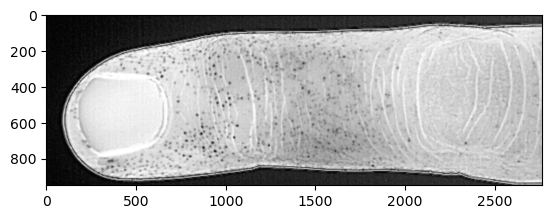

In [2]:
# OpenCV - thresholding 
# import image 
image_path = '/Users/rickysu/Projects/sweatPoresActivation/images/finger1.png'

# init_image is a 2D-array of shape (height(rows), width(cols))
# Each element in init_image will be an integer value between 0 and 255, 
# representing the intensity of the corresponding pixel in the grayscale image.
init_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) # change the image to grayscale.

# Display the image using matplotlib
plt.imshow(init_image, cmap='gray')  # cmap='gray' ensures it's shown in grayscale
plt.show()

## Global Thresholding - binary thresholding 

In [4]:
# Apply simple binary thresholding
# If a pixel value is greater than the threshold (let's say 127), it is set to 255 (white); otherwise, it is set to 0 (black).
# cv2.threshold is an OpenCV function that applies fixed-level thresholding to a single-channel array
# cv2.threshold (source image, threshold value, maxium value to use with the "thresh binary", 
#                                               it creates a binary image where the thresholding condition is applied)
# thresholded_image: result of the thresholding operation, a binary image where pixels are either 0 or 255
# retval: is the threshold value used

retval, thresholded_image = cv2.threshold(init_image, 127, 255, cv2.THRESH_BINARY)

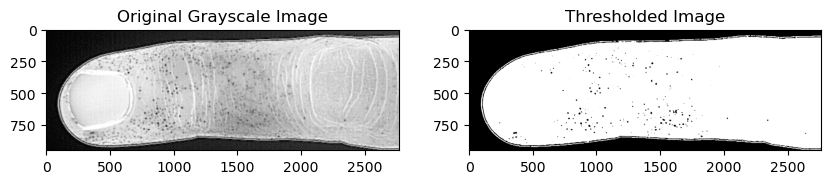

In [5]:
# Display the original and thresholded images for comparison

plt.figure(figsize=(10, 5)) # creates the new figure for plotting in the specified size

 # creates a subplot in a grid that is 1 row by 2 columns, and selects the first subplot as the current plot.
plt.subplot(1, 2, 1)
plt.title('Original Grayscale Image')
plt.imshow(init_image, cmap='gray')

#creates a subplot in a grid that is 1 row by 2 columns, and selects the second subplot as the current plot.
plt.subplot(1, 2, 2) 
plt.title('Thresholded Image')
plt.imshow(thresholded_image, cmap='gray')

plt.show()

## Adaptive Thresholding 
### Adaptive thresholding adjusts the threshold value for different regions of the image based on their local pixel intensities

## 1. Mean thresholding

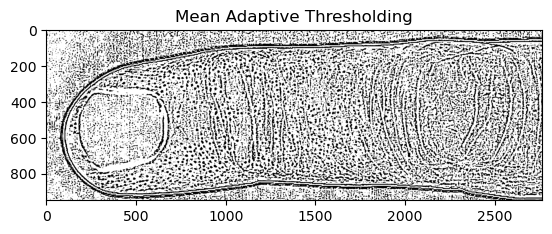

In [6]:
# Determine threshold for each pixel: 
# For every pixel, the algorithm calculates the mean of the pixel values in a block (neighborhood) around that pixel 
# (excluding the pixel itself). The size of this block is defined by the parameter 11, meaning an 11x11 block.

# Applying the threshold:
# If the pixel's value is greater than the mean minus C (where C is 2 in this case), the pixel is set to the maximum value (255, white). 
# Otherwise, it is set to the minimum value (0, black).

mean_thresh_image = cv2.adaptiveThreshold(init_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Display the image using matplotlib
plt.imshow(mean_thresh_image, cmap='gray')  # cmap='gray' ensures it's shown in grayscale
plt.title('Mean Adaptive Thresholding') 
plt.show()

## 2. Gaussian thresholding

In [7]:
# Determining the Threshold for Each Pixel: 
# For every pixel in the image, the algorithm calculates a weighted sum of the pixel values in its neighborhood. 
# The weights are determined by a Gaussian function, centered on the pixel in question. 
# The size of the neighborhood is defined by the block size, which is 11x11 in this case.

# Applying the Threshold: 
# The calculated Gaussian-weighted sum minus the constant C (2 in this instance) serves as the threshold. 
# If a pixel's value is higher than this threshold, it is set to the maximum value (255, white). 
# Otherwise, it is set to the minimum value (0, black).

gaussian_thresh_image = cv2.adaptiveThreshold(init_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

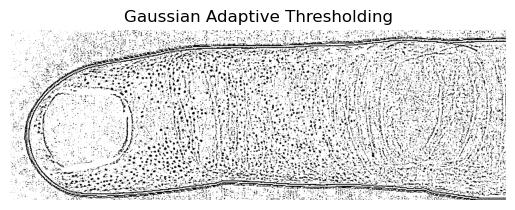

In [8]:
# Display the image using Matplotlib
plt.imshow(gaussian_thresh_image, cmap='gray')
plt.title('Gaussian Adaptive Thresholding')
plt.axis('off')
plt.show()

## Block Size Determination
### The block size is an odd positive integer that represents the side length of a square neighborhood around each pixel.

### The choice of block size is the trade-off between local sensitivity and how resistant it is to being messed up by things like noise and changes in lighting.

### Normally we start with a medium block size 11 X 11.If the picture looks too messy or broken up, making the block size bigger can help make it clearer. But if you're losing important stuff or the picture looks too smoothed out, making the block size smaller can keep more of the small details.


### The constant value C helps to adjust the threshold value for each pixel based on its surrounding neighborhood


In [9]:
# Checking the result for different block size 

gaussian_thresh_image_11 = cv2.adaptiveThreshold(init_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
gaussian_thresh_image_9 = cv2.adaptiveThreshold(init_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 2)
gaussian_thresh_image_7 = cv2.adaptiveThreshold(init_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 7, 2)
gaussian_thresh_image_5 = cv2.adaptiveThreshold(init_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5, 2)

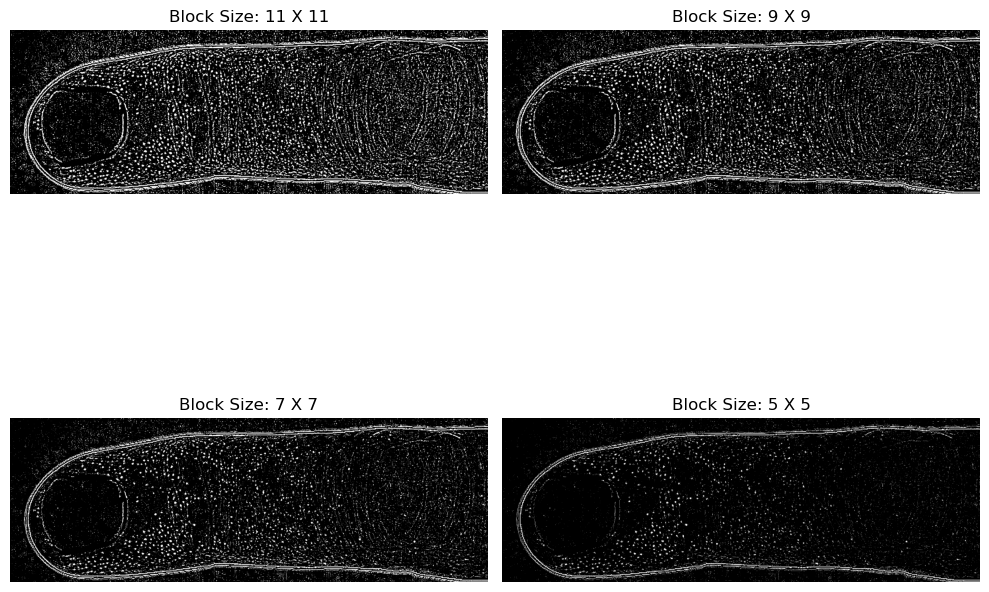

In [10]:
# Create a figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Display the images in the subplots
# Notice that there's a "~" operator before gaussian_threshold_image. It inverts the pixels value 
# so white pixels (255) become black (0), and black pixels (0) become white (255).

axs[0, 0].imshow(~gaussian_thresh_image_11, cmap='gray')
axs[0, 0].set_title('Block Size: 11 X 11')
axs[0, 0].axis('off')

axs[0, 1].imshow(~gaussian_thresh_image_9, cmap='gray')
axs[0, 1].set_title('Block Size: 9 X 9')
axs[0, 1].axis('off')

axs[1, 0].imshow(~gaussian_thresh_image_7, cmap='gray')
axs[1, 0].set_title('Block Size: 7 X 7')
axs[1, 0].axis('off')

axs[1, 1].imshow(~gaussian_thresh_image_5, cmap='gray')
axs[1, 1].set_title('Block Size: 5 X 5')
axs[1, 1].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

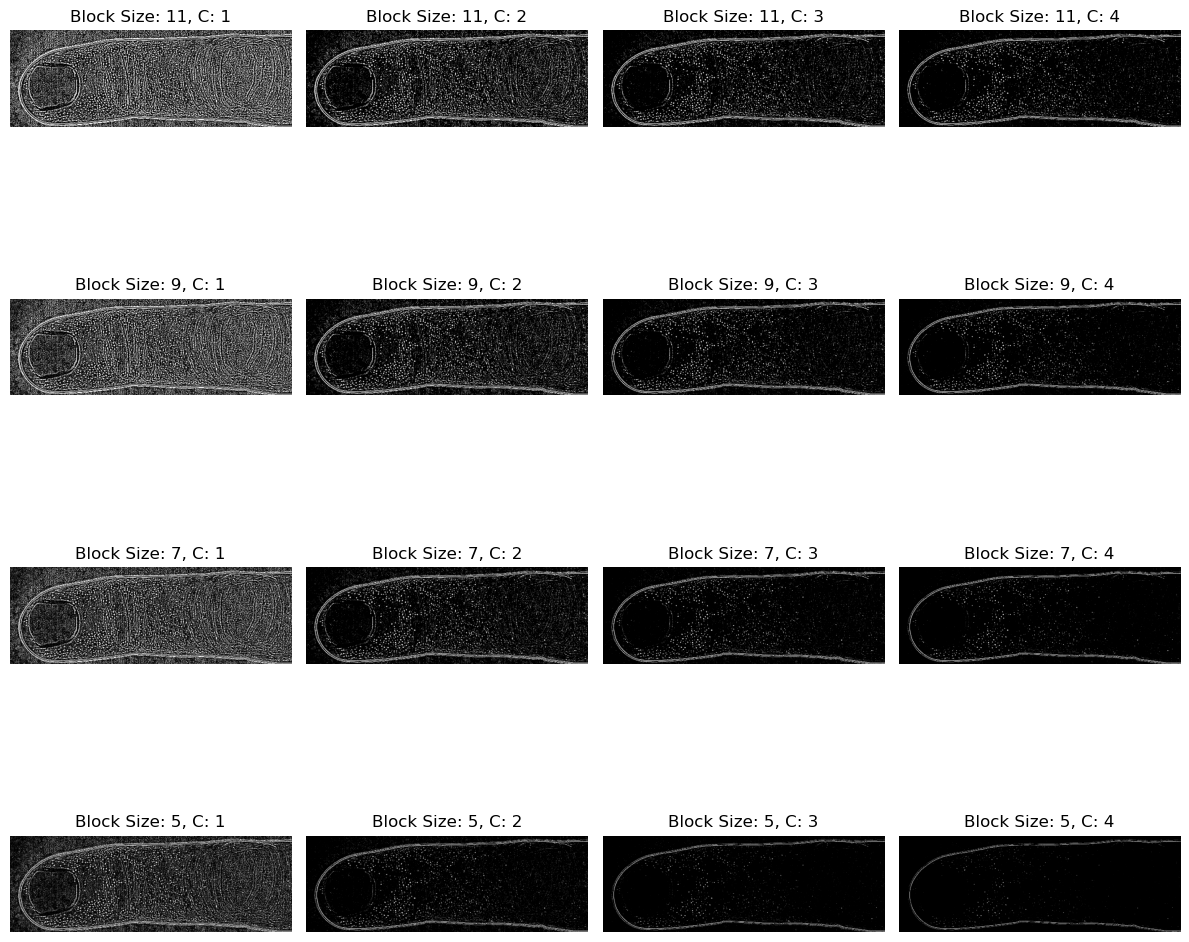

In [11]:
# Define the block sizes and C values to try
block_sizes = [11, 9, 7, 5]
c_values = [1, 2, 3, 4]

# Create a figure with subplots
fig, axs = plt.subplots(4, 4, figsize=(12, 12))
axs = axs.ravel()

# Apply adaptive thresholding with different block sizes and C values
for i, block_size in enumerate(block_sizes):
    for j, c_value in enumerate(c_values):
        gaussian_thresh_image = cv2.adaptiveThreshold(
            init_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY, block_size, c_value
        )
        
        # Display the image in the corresponding subplot
        index = i * 4 + j
        axs[index].imshow(~gaussian_thresh_image, cmap='gray')
        axs[index].set_title(f'Block Size: {block_size}, C: {c_value}')
        axs[index].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## Automatic block size and C value selection: 
### We can automatically determine the block size and C value based on the image dimensions.

In [3]:
# Calculate the block size based on the image dimensions
rows, cols = init_image.shape

# -------------- Block Size -------------- # 
# calculate the block size that is a fraction of the image width or height
block_size1 = int(cols / 8) 
# Calculate the block size based on the square root of the image area
block_size2 = int(np.sqrt(rows * cols))
# Calculate the block size based on the logarithm of the image dimensions
block_size3 = int(np.log2(min(rows, cols)))

# --------------  C Value   -------------- # 
# Define the target image size and corresponding ideal C value
target_width = 1000
target_height = 2700
target_c_value = 3

# Calculate the ratio of the current image size to the target size (the smaller the size of image the greater the C value, vice versa)
width_ratio =  target_width /  cols 
height_ratio = target_height / rows 

# Calculate the C value based on the size ratio and target C value
c_value = target_c_value * width_ratio * height_ratio

# Round the C value to two decimal places
c_value = round(c_value, 2)


# List of block size variables
block_sizes = [block_size1, block_size2, block_size3]

# Ensure the block size is odd
for i in range(len(block_sizes)):
    if block_sizes[i] % 2 == 0:
        block_size[i] += 1

print("rows:", rows,"cols: ", cols)
print()
print("Fraction generated block size: ", block_size1)
print("Square root generated block size: ", block_size2)
print("Log generated block size: ", block_size3)
print()
print("C Value: {:.2f}".format(c_value))

rows: 948 cols:  2766

Fraction generated block size:  345
Square root generated block size:  1619
Log generated block size:  9

C Value: 3.09


## Pipeline 1: Image details amplification System
### This pipeline is going to take a list of image paths as a parameter and display the modified images 
### The guassian_thresholding function will be called from the display_gaussian_thresholded_images function 

In [4]:
# Function: gaussian_thresholding
# Param: image_path, block_size, and c_value 

def gaussian_thresholding(image_path, block_size=7, c_value=3):
    # Read the image in grayscale
    init_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


    #----------------Block Size Determination-----------------#
    # Calculate the block size based on the image dimensions
    rows, cols = init_image.shape

    # Calculate the block size based on the logarithm of the image dimensions
    block_size = int(np.log2(min(rows, cols)))

    # Ensure the block size is odd
    if block_size % 2 == 0:
        block_size += 1
    #---------------------------------------------------------#


    
    # -----------------------  C Value   -------------------- # 
    # Define the target image size and corresponding ideal C value
    # The way I determined the target (width, height, and C_value) is based on multiple experiments 
    # that yielded the best results for my specific case 
    # Image base: finger1.png
    target_width = 1000
    target_height = 2700
    target_c_value = 3
    
    # Calculate the ratio of the current image size to the target size
    width_ratio =  target_width /  cols 
    height_ratio = target_height / rows 
    
    # Calculate the C value based on the size ratio and target C value
    c_value = target_c_value * width_ratio * height_ratio

    # Round the C value to two decimal places
    c_value = round(c_value, 2)
    #---------------------------------------------------------#
    

    
    info = f"Rows: {rows}  Cols: {cols}  Block Size: {block_size}  C Value: {c_value}"
    
    # Apply adaptive Gaussian thresholding
    gaussian_thresh_image = cv2.adaptiveThreshold(
        init_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, block_size, c_value
    )
    
    return gaussian_thresh_image, info

In [5]:
# Function: display_images
#           This function will show the processed image with the Gaussian thresholding method 
# Param: image_path(s)
#        image_path is a list of image paths

def display_gaussian_thresholded_images(image_paths):
    # Create a figure with subplots
    # Note: plt.subplots() returns a tuple containing the figure object (fig)
    #                      and an array of subplot axes objects (axs)
    
    #       2 represents the number of columns
    fig, axs = plt.subplots(len(image_paths), 2, figsize=(10, 5*len(image_paths)))
    
    # Iterate over the image paths
    for i, image_path in enumerate(image_paths):
        
        # Apply Gaussian thresholding to the image
        gaussian_thresh_image, info = gaussian_thresholding(image_path)

        # Apply Non-Local Means denoising
        # denoised_image = cv2.fastNlMeansDenoising(~gaussian_thresh_image, None, h=10, templateWindowSize=7, searchWindowSize=21)
        
        # Display the original and processed images
        # first row is going to show the original images
        axs[i, 0].imshow(cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), cmap='gray')
        axs[i, 0].set_title('Original Image')
        axs[i, 0].axis('off')
        
        # the second row is going to show the modified images
        axs[i, 1].imshow(~gaussian_thresh_image, cmap='gray')
        axs[i, 1].set_title('Gaussian Thresholding')
        axs[i, 1].text(0.5, -0.1, info, ha='center', va='center', transform=axs[i, 1].transAxes)
        axs[i, 1].axis('off')
    
    # Adjust the spacing between subplots
    plt.tight_layout()
    
    # Display the plot
    plt.show()

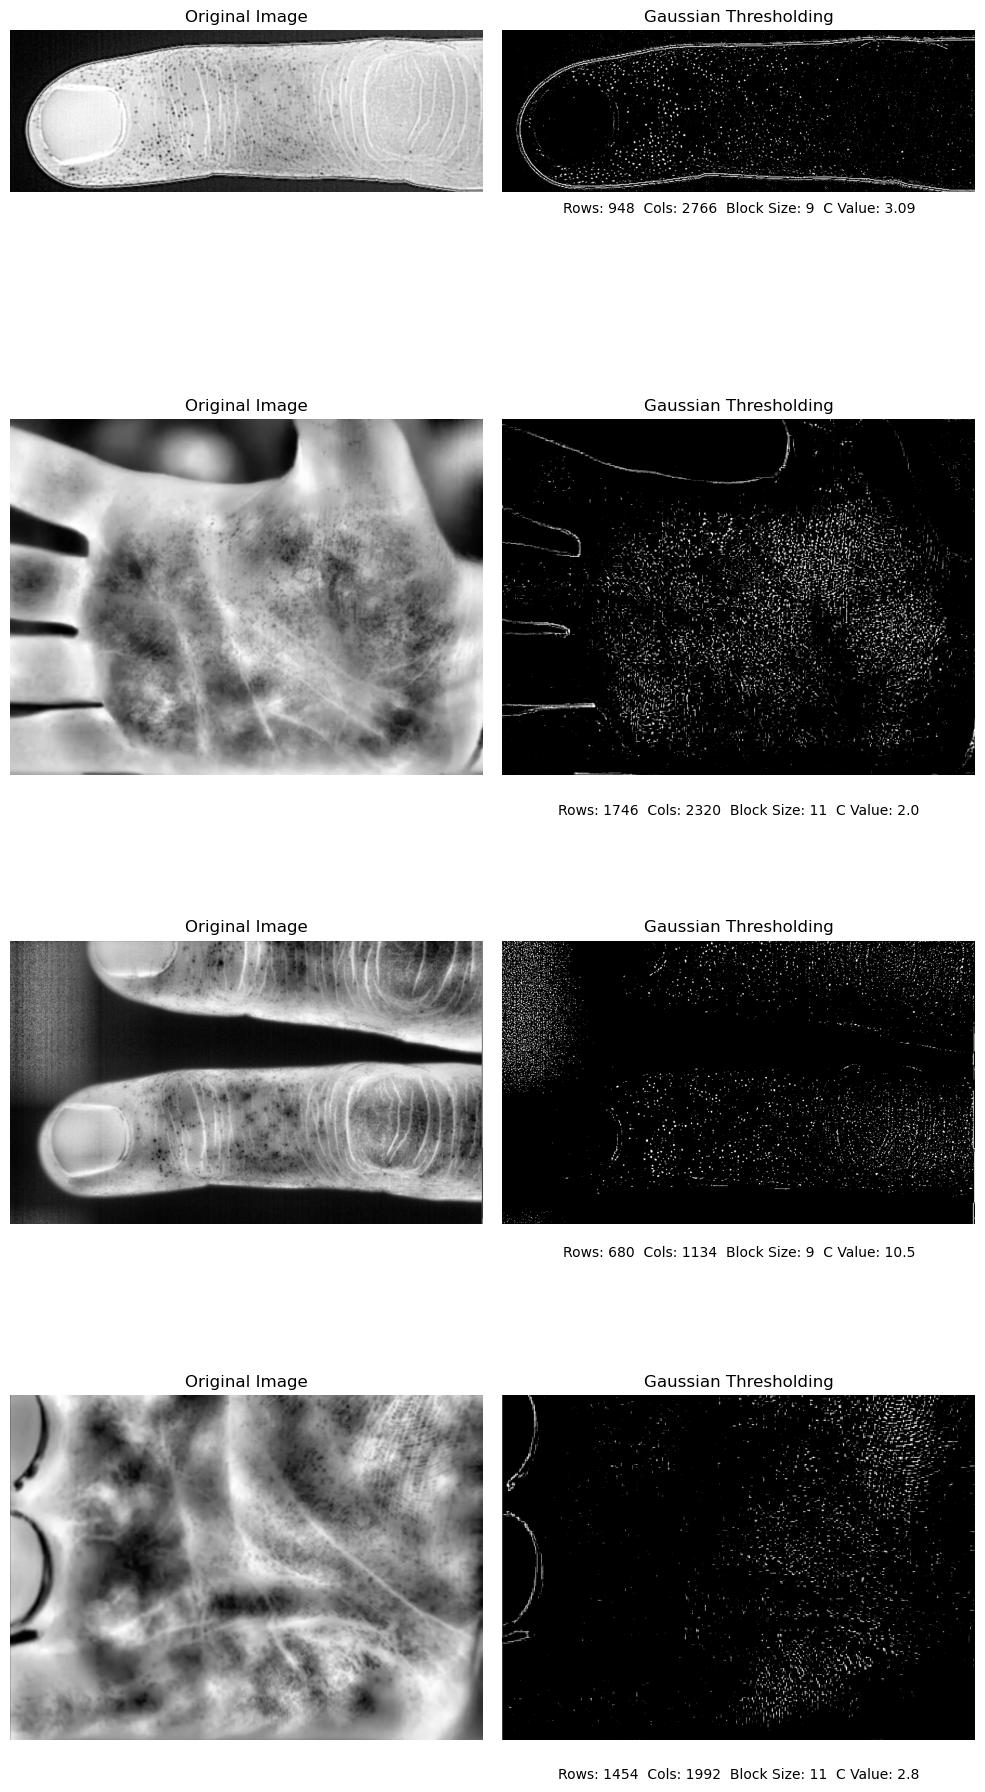

In [6]:
# Note: It's crucial to ensure that the images being imported are of high quality and clarity 
#       The object should be positioned parallel to the camera to minimize reflections and avoid any ambiguity or vagueness

image_paths =  ['/Users/rickysu/Projects/sweatPoresActivation/images/finger1.png', 
                '/Users/rickysu/Projects/sweatPoresActivation/images/palm.png', 
                '/Users/rickysu/Projects/sweatPoresActivation/images/fingers.png',
                '/Users/rickysu/Projects/sweatPoresActivation/images/righthand-trail1.png']

display_gaussian_thresholded_images(image_paths)